In [1]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\111897


In [2]:
import pyodbc
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
cnxn = pyodbc.connect(driver='{SQL Server}', server='10.11.48.12', database='FZSRD_BD',               
               trusted_connection='yes')

#sql = 'SELECT top 10 * FROM v_customer_數位帳戶客戶'
sql = 'SELECT top 10 unino,性別,opening_date,age,JOB_TITLE_1,職業,教育程度,台外幣總存款餘額,當月AP總計,房貸開戶月,年齡 FROM v_customer_數位帳戶客戶'

data=pd.read_sql(sql, cnxn)

print(data.columns)

cnxn.close()

Index(['unino', '性別', 'opening_date', 'age', 'JOB_TITLE_1', '職業', '教育程度',
       '台外幣總存款餘額', '當月AP總計', '房貸開戶月', '年齡'],
      dtype='object')


In [29]:
print(data.describe())

             age      台外幣總存款餘額       當月AP總計         年齡
count  10.000000  1.000000e+01    10.000000  10.000000
mean   34.600000  9.023614e+05  -811.930000  34.600000
std     7.089899  1.449903e+05  1758.951715   7.089899
min    28.000000  5.428210e+05 -5790.150000  28.000000
25%    30.500000  8.981848e+05  -268.550000  30.500000
50%    32.500000  9.369755e+05  -261.835000  32.500000
75%    34.000000  9.996468e+05  -246.380000  34.000000
max    51.000000  1.018423e+06   -27.010000  51.000000


In [30]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unino         10 non-null     object 
 1   性別            10 non-null     object 
 2   opening_date  10 non-null     object 
 3   age           10 non-null     int64  
 4   JOB_TITLE_1   10 non-null     object 
 5   職業            10 non-null     object 
 6   教育程度          10 non-null     object 
 7   台外幣總存款餘額      10 non-null     float64
 8   當月AP總計        10 non-null     float64
 9   房貸開戶月         10 non-null     object 
 10  年齡            10 non-null     int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1008.0+ bytes


In [46]:
data["年齡"] = data["年齡"].astype(int)
data["當月AP總計"] = data["當月AP總計"].astype(int)
#data["房貸開戶月"] = data["房貸開戶月"].astype(str)
data["房貸開戶月"] = data["房貸開戶月"].astype('category')


In [47]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   unino         10 non-null     object  
 1   性別            10 non-null     object  
 2   opening_date  10 non-null     object  
 3   age           10 non-null     int64   
 4   JOB_TITLE_1   10 non-null     object  
 5   職業            10 non-null     object  
 6   教育程度          10 non-null     object  
 7   台外幣總存款餘額      10 non-null     float64 
 8   當月AP總計        10 non-null     int32   
 9   房貸開戶月         10 non-null     category
 10  年齡            10 non-null     int32   
dtypes: category(1), float64(1), int32(2), int64(1), object(6)
memory usage: 946.0+ bytes


In [48]:
data.dtypes

unino             object
性別                object
opening_date      object
age                int64
JOB_TITLE_1       object
職業                object
教育程度              object
台外幣總存款餘額         float64
當月AP總計             int32
房貸開戶月           category
年齡                 int32
dtype: object

In [49]:
print("{}".format(data['性別']))
print("{}".format(data['unino']))
print("{}".format(data['age']))
print("{}".format(data['教育程度']))
print("{}".format(data['當月AP總計']))

0    男
1    男
2    男
3    女
4    男
5    女
6    男
7    女
8    女
9    男
Name: 性別, dtype: object
0    D1771549630
1    F1789588330
2    S1735334280
3    A2704849650
4    W1225615430
5    S2723625910
6    N1717905580
7    S2735043020
8    H2757005300
9    F1709499110
Name: unino, dtype: object
0    28
1    32
2    30
3    34
4    33
5    51
6    32
7    29
8    43
9    34
Name: age, dtype: int64
0    4大學
1    2高中
2    5碩士
3    4大學
4    4大學
5    2高中
6    4大學
7    5碩士
8    4大學
9    4大學
Name: 教育程度, dtype: object
0   -5790
1     -27
2    -261
3    -267
4    -711
5    -245
6    -248
7     -35
8    -268
9    -262
Name: 當月AP總計, dtype: int32


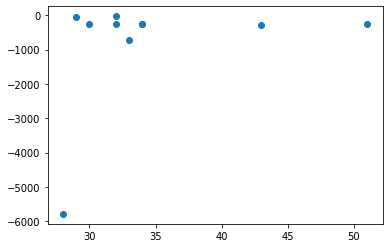

In [53]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(data['age'],data['當月AP總計'])
plt.show()

In [54]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [68]:
len(data['age'])
x = np.array(data.iloc[:,-1])
y = np.array(data.iloc[:,-3])
x = x.reshape(-1,1)
print(x)
print(y)
reg.fit(x,y)


[[28]
 [32]
 [30]
 [34]
 [33]
 [51]
 [32]
 [29]
 [43]
 [34]]
[-5790   -27  -261  -267  -711  -245  -248   -35  -268  -262]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
reg.coef_

array([78.49557913])